In [124]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [125]:
def load_housing_data():
    tarball_path = Path('datasets/housing.tgz')
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [126]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [127]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [128]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [129]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [130]:
%matplotlib inline
import matplotlib.pyplot as plt

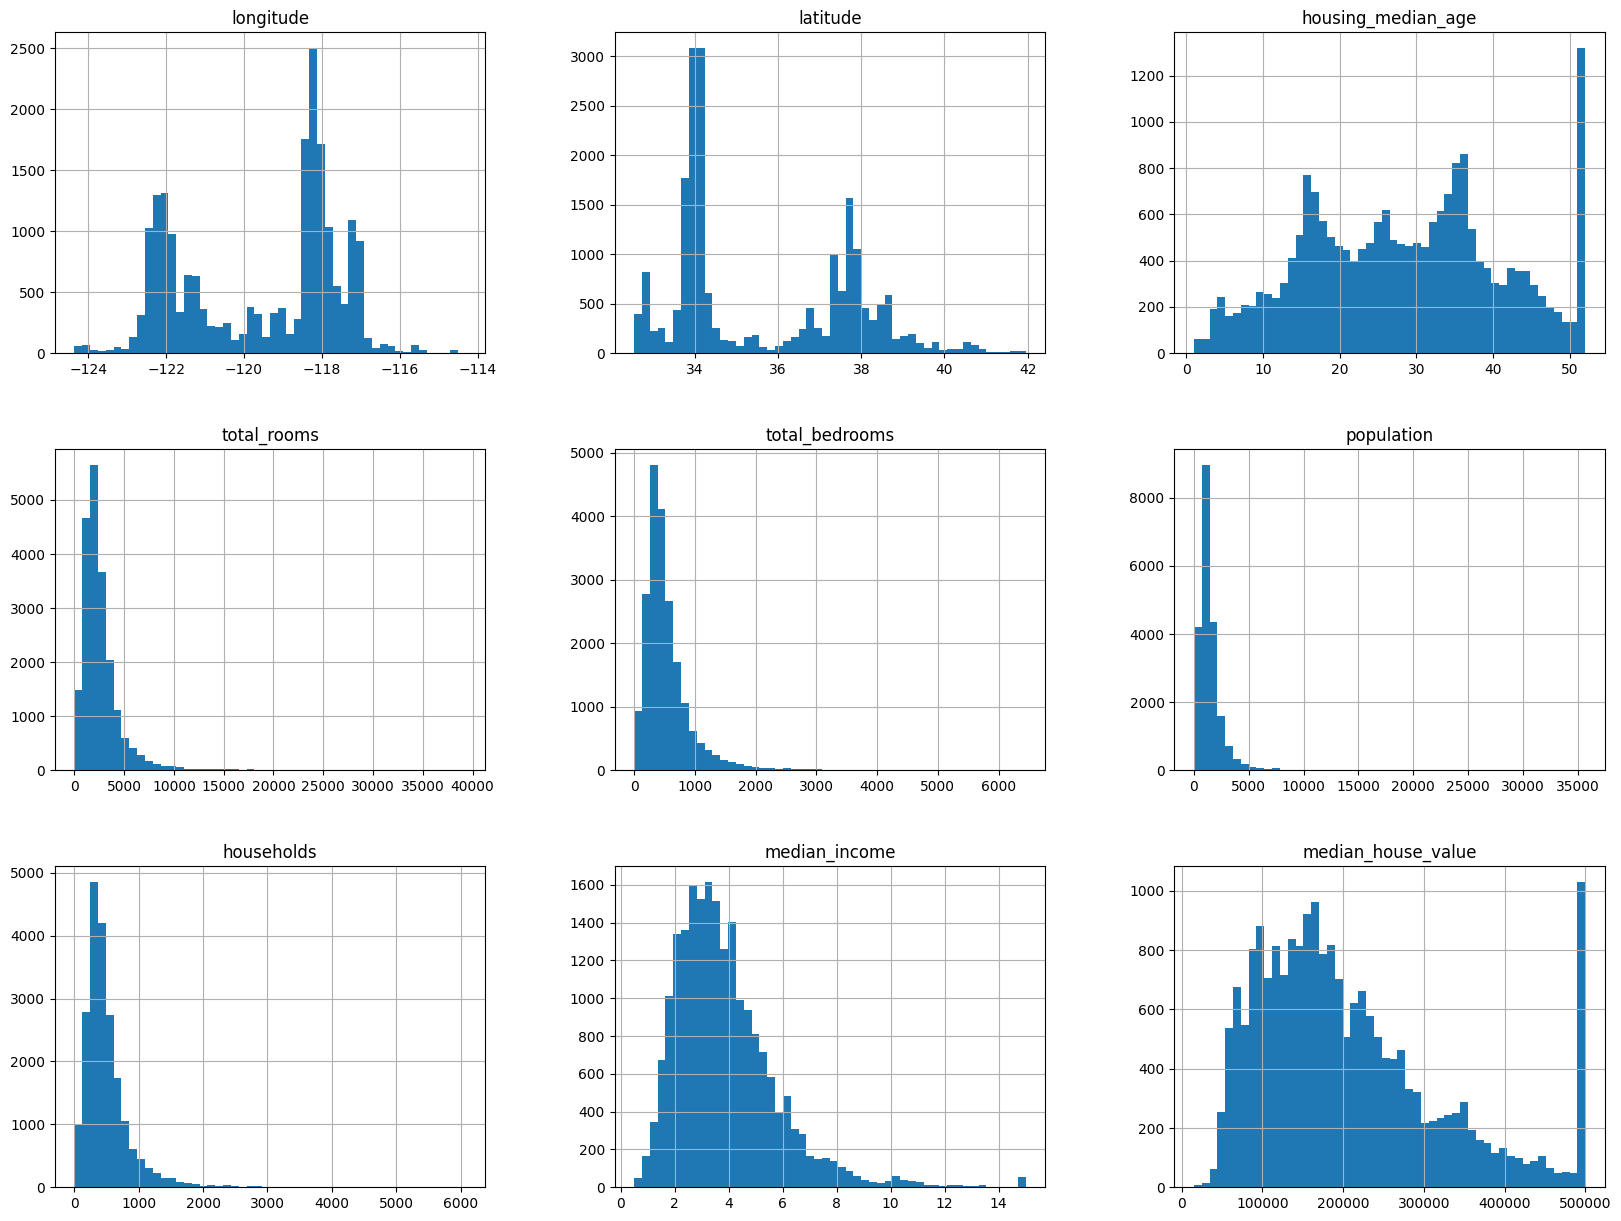

In [131]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [132]:
import numpy as np
from sklearn.model_selection import train_test_split

In [133]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [134]:
housing = train_set.copy()

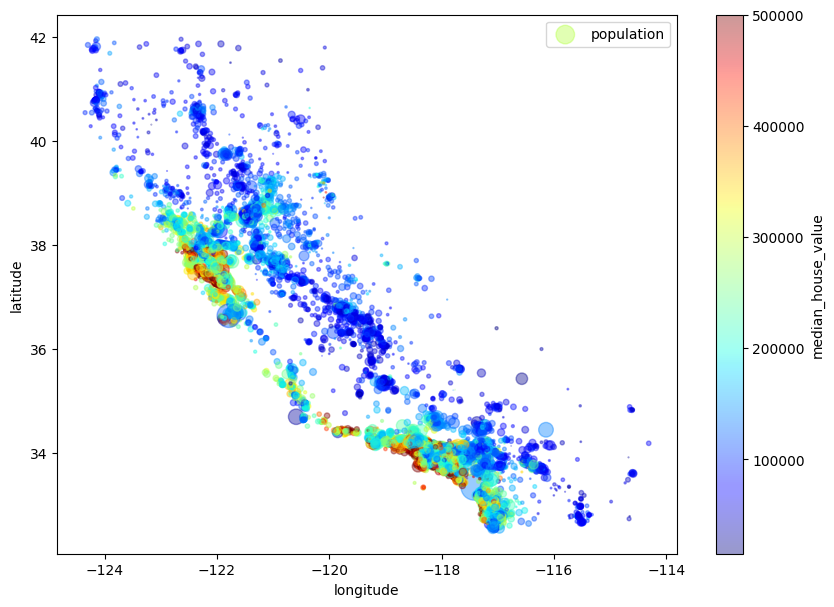

In [135]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [136]:
corr_housing = housing.copy()

In [137]:
corr_housing = corr_housing.drop('ocean_proximity', axis=1)

In [138]:
corr_matrix = corr_housing.corr()

In [139]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687013
total_rooms           0.134060
housing_median_age    0.104714
households            0.065798
total_bedrooms        0.049993
population           -0.025820
longitude            -0.043603
latitude             -0.146324
Name: median_house_value, dtype: float64

In [140]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

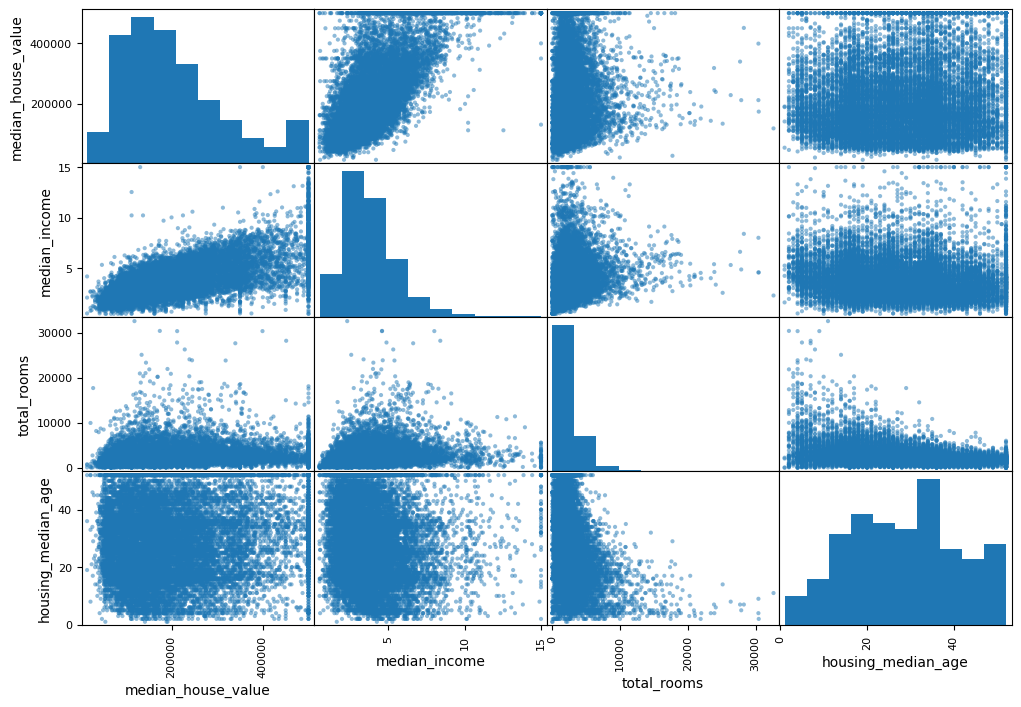

In [141]:
from pandas.plotting import scatter_matrix

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

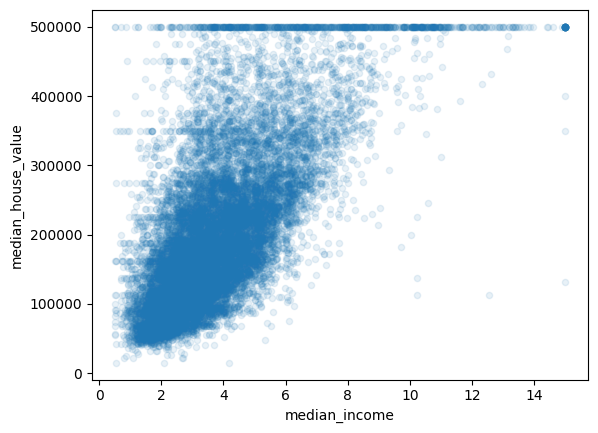

In [142]:
housing.plot(kind='scatter', x='median_income', y='median_house_value',
            alpha=0.1)

In [143]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']

In [144]:
housing['bedrooms_per_rooms'] = housing['total_bedrooms'] / housing['total_rooms']

In [145]:
housing['population_per_household'] = housing['population'] / housing['households']

In [146]:
corr_housing = housing.copy()

In [147]:
corr_housing = corr_housing.drop('ocean_proximity', axis=1)

In [148]:
corr_matrix = corr_housing.corr()

In [149]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687013
rooms_per_household         0.146940
total_rooms                 0.134060
housing_median_age          0.104714
households                  0.065798
total_bedrooms              0.049993
population_per_household   -0.021577
population                 -0.025820
longitude                  -0.043603
latitude                   -0.146324
bedrooms_per_rooms         -0.254817
Name: median_house_value, dtype: float64

In [150]:
housing = train_set.drop('median_house_value', axis=1)
housing_labels = train_set['median_house_value'].copy()

In [151]:
from sklearn.impute import SimpleImputer

In [152]:
imputer = SimpleImputer(strategy='median')

In [153]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [154]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [155]:
X = imputer.transform(housing_num)

In [156]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [157]:
housing_cat = housing[['ocean_proximity']]

In [158]:
housing_cat.head(10)

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR BAY
14265,<1H OCEAN
2271,INLAND
17848,NEAR BAY
6252,INLAND
9389,<1H OCEAN
6113,INLAND
6061,<1H OCEAN


In [159]:
from sklearn.preprocessing import OrdinalEncoder

In [160]:
ordinal_encoder = OrdinalEncoder()

In [161]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [162]:
housing_cat_encoded[:10]

array([[4.],
       [4.],
       [3.],
       [0.],
       [1.],
       [3.],
       [1.],
       [0.],
       [1.],
       [0.]])

In [163]:
from sklearn.preprocessing import OneHotEncoder

In [164]:
cat_encoder = OneHotEncoder()

In [165]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [166]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [167]:
from sklearn.preprocessing import StandardScaler

In [170]:
std_scaler = StandardScaler()

In [172]:
housing_num_tr = std_scaler.fit(housing_num)

In [174]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
])

In [175]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
lin_reg = LinearRegression()

In [179]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [180]:
from sklearn.metrics import mean_squared_error

In [182]:
housing_predictions = lin_reg.predict(housing_prepared)

In [183]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [184]:
lin_rmse = np.sqrt(lin_mse)

In [185]:
lin_rmse

68458.0127473328

In [187]:
from sklearn.tree import DecisionTreeRegressor

In [188]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [189]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [190]:
from sklearn.model_selection import cross_val_score

In [191]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [192]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [68078.18180276 70076.48103237 67219.61806178 68091.86182236
 68151.89701977 65153.049077   69129.24512273 65641.69944687
 68275.83180748 70121.01419188]
Mean: 67993.88793850089
Standard deviation: 1564.4395021803848


In [194]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error",
                            cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [68321.60481688 71621.58230047 66723.0183533  66883.89197645
 70968.05496802 67808.70012254 68145.22005801 67721.99960087
 70146.22067075 67601.09339454]
Mean: 68594.13862618302
Standard deviation: 1620.9678856536916


In [195]:
from sklearn.ensemble import RandomForestRegressor

In [196]:
forest_reg = RandomForestRegressor()

In [197]:
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [198]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error",
                            cv=10)

forest_rmse_scores = np.sqrt(-lin_scores)

In [199]:
from sklearn.model_selection import GridSearchCV

In [200]:
param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                            scoring='neg_mean_squared_error',
                            return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [201]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [202]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63478.338130068245 {'max_features': 2, 'n_estimators': 3}
55157.78766693579 {'max_features': 2, 'n_estimators': 10}
51932.523983056264 {'max_features': 2, 'n_estimators': 30}
59573.54036207559 {'max_features': 4, 'n_estimators': 3}
52534.014824650665 {'max_features': 4, 'n_estimators': 10}
50142.751125353665 {'max_features': 4, 'n_estimators': 30}
59032.2285088496 {'max_features': 6, 'n_estimators': 3}
51763.7777107667 {'max_features': 6, 'n_estimators': 10}
50040.40998905457 {'max_features': 6, 'n_estimators': 30}
58554.98939496879 {'max_features': 8, 'n_estimators': 3}
51810.692938900094 {'max_features': 8, 'n_estimators': 10}
49702.98358239649 {'max_features': 8, 'n_estimators': 30}
61709.97061453803 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54218.04083846252 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59146.461657835665 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52056.48421928818 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [203]:
final_model = grid_search.best_estimator_
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [204]:
from scipy import stats

In [205]:
confidence = 0.95

In [206]:
squared_errors = (final_predictions - y_test) ** 2

In [207]:
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors)))

array([47643.54849764, 52141.47700509])